In [69]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [70]:
df = pd.read_csv("bank-full.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [71]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [73]:
#Shape of the dataset:
df.shape

(45211, 17)

In [74]:
df.isnull().count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

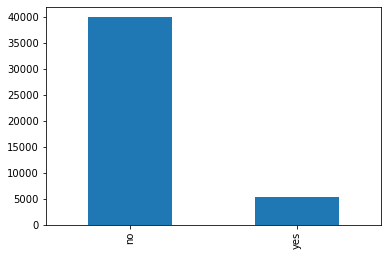

In [75]:
#Bar plot for the categorical variable in the dataset:
df['y'].value_counts().plot.bar()

In [76]:
#performing one hot encoding to the categorical variables:
from sklearn.preprocessing import OneHotEncoder

In [77]:
df = pd.get_dummies(df,columns=['job','marital','education','contact','month','poutcome'])
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [79]:
import numpy as np

In [80]:
#Binary encoding for the catergorical variables default, housing, loan and y:
df['default'] = np.where(df['default'].str.contains("yes"),1,0)
df['housing'] = np.where(df['housing'].str.contains("yes"),1,0)
df['loan'] = np.where(df['loan'].str.contains("yes"),1,0)
df['y'] = np.where(df['y'].str.contains("yes"),1,0)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [82]:
# Dividing our data into input and output variables
x=pd.concat([df.iloc[:,0:10],df.iloc[:,11:]],axis=1)
y=df.iloc[:,10]

In [83]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  job_admin.           45211 non-null  uint8
 11  job_blue-collar      45211 non-null  uint8
 12  job_entrepreneur     45211 non-null  uint8
 13  job_housemaid        45211 non-null  uint8
 14  job_management       45211 non-null  uint8
 15  job_retired          45211 non-null  uint8
 16  job_self-employed    4

In [84]:
x1 = df[df.columns.difference(['y'])]

In [86]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   campaign             45211 non-null  int64
 3   contact_cellular     45211 non-null  uint8
 4   contact_telephone    45211 non-null  uint8
 5   contact_unknown      45211 non-null  uint8
 6   day                  45211 non-null  int64
 7   default              45211 non-null  int32
 8   duration             45211 non-null  int64
 9   education_primary    45211 non-null  uint8
 10  education_secondary  45211 non-null  uint8
 11  education_tertiary   45211 non-null  uint8
 12  education_unknown    45211 non-null  uint8
 13  housing              45211 non-null  int32
 14  job_admin.           45211 non-null  uint8
 15  job_blue-collar      45211 non-null  uint8
 16  job_entrepreneur     4

In [87]:
y_1 = df['y']
y_1

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [88]:
y_1.info()

AttributeError: 'Series' object has no attribute 'info'

In [89]:
y.info()

AttributeError: 'Series' object has no attribute 'info'

In [90]:
#logistic regression to fit the model:
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\GOWRI DHANASEKARAN\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
#Model predictions:
y_pred = classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
y_pred_df = pd.DataFrame({"actual_Y":y, "Predicted":y_pred})
y_pred_df

,actual_Y,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [96]:
#Model accuracy:
from sklearn.metrics import confusion_matrix
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39493,   429],
       [ 4566,   723]], dtype=int64)

In [ ]:
#Calculating the model accuracy:


In [97]:
print(confusion_matrix)

[[39493   429]
 [ 4566   723]]


In [98]:
# import required modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

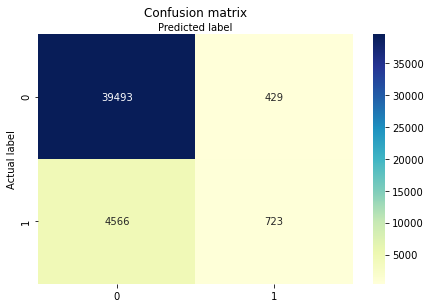

In [99]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [102]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))

Accuracy: 0.8895180376457057
Precision: 0.6276041666666666
Recall: 0.1366988088485536


In [106]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

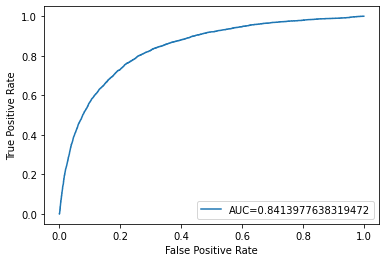

In [110]:
#define metrics
y_pred_proba = classifier.predict_proba(x)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
#The ROC value is 0.84 by which we can conclude that our model performs a good job in clasifiying.